In [1]:
import os
import random
import torch
import numpy as np
from torchvision import models
from torch import nn, optim
from torch.optim import lr_scheduler

from data_loading import Data
from model_training import train_model, plot_training_history
from model_testing import test_model, plot_examples

In [2]:
random_seed = 42
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
data = Data('C:/Users/weron/Pulpit/sem1/dl/proj1/archive')

## EfficientNet B0


In [5]:
model_ft = models.efficientnet_b0(weights='IMAGENET1K_V1')
num_ftrs =  model_ft.classifier[1].in_features
model_ft.classifier = nn.Sequential(
    nn.Dropout(p=0.2),
    nn.Linear(num_ftrs, len(data.class_names))
)
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [6]:
model_ft, train_loss, train_acc, val_loss, val_acc = train_model(
    model_ft, criterion, optimizer_ft, exp_lr_scheduler, data.dataloaders, device, num_epochs=15
)

Epoch 0/14
----------
train Loss: 1.1493 Acc: 0.6007
valid Loss: 0.4859 Acc: 0.8293

Epoch 1/14
----------
train Loss: 0.8157 Acc: 0.7132
valid Loss: 0.3893 Acc: 0.8617

Epoch 2/14
----------
train Loss: 0.7361 Acc: 0.7399
valid Loss: 0.3490 Acc: 0.8770

Epoch 3/14
----------
train Loss: 0.6863 Acc: 0.7578
valid Loss: 0.3286 Acc: 0.8836

Epoch 4/14
----------
train Loss: 0.6497 Acc: 0.7701
valid Loss: 0.3042 Acc: 0.8915

Epoch 5/14
----------
train Loss: 0.6228 Acc: 0.7808
valid Loss: 0.2992 Acc: 0.8942

Epoch 6/14
----------
train Loss: 0.5979 Acc: 0.7896
valid Loss: 0.2882 Acc: 0.8970

Epoch 7/14
----------
train Loss: 0.5728 Acc: 0.7972
valid Loss: 0.2777 Acc: 0.9015

Epoch 8/14
----------
train Loss: 0.5662 Acc: 0.8002
valid Loss: 0.2744 Acc: 0.9030

Epoch 9/14
----------
train Loss: 0.5579 Acc: 0.8039
valid Loss: 0.2712 Acc: 0.9037

Epoch 10/14
----------
train Loss: 0.5590 Acc: 0.8033
valid Loss: 0.2699 Acc: 0.9037

Epoch 11/14
----------
train Loss: 0.5495 Acc: 0.8066
valid Loss

In [7]:
# import pandas as pd

# # Define the file paths
# loss_file = 'experiments/EfficientNet_B0_loss.csv'
# acc_file = 'experiments/EfficientNet_B0_acc.csv'

# # Load the loss data
# loss_df = pd.read_csv(loss_file)
# train_loss = loss_df['Train Loss'].tolist()
# val_loss = loss_df['Validation Loss'].tolist()

# # Load the accuracy data
# acc_df = pd.read_csv(acc_file)
# train_acc = acc_df['Train Accuracy'].tolist()
# val_acc = acc_df['Validation Accuracy'].tolist()

# model_ft = models.efficientnet_b0(weights='IMAGENET1K_V1')
# num_ftrs = model_ft.classifier[1].in_features  # Get features from last linear layer
# model_ft.classifier = nn.Sequential(
#     nn.Dropout(p=0.2),  # Keep dropout layer
#     nn.Linear(num_ftrs, 10)  # Replace final layer with 10 output classes
# )
# model_ft = model_ft.to(device)
# model_ft.load_state_dict(torch.load('experiments/EfficientNet_B0_model.pt', weights_only=True))

# sample_input = torch.randn(1, 3, 224, 224).to(device)
# model_ft.eval()
# with torch.no_grad():
#     output = model_ft(sample_input)
# print(output.shape)  # Should be (1, 10)


In [8]:
title = 'EfficientNet_B0'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model_ft.state_dict(), os.path.join(folder, 'best_model.pt'))

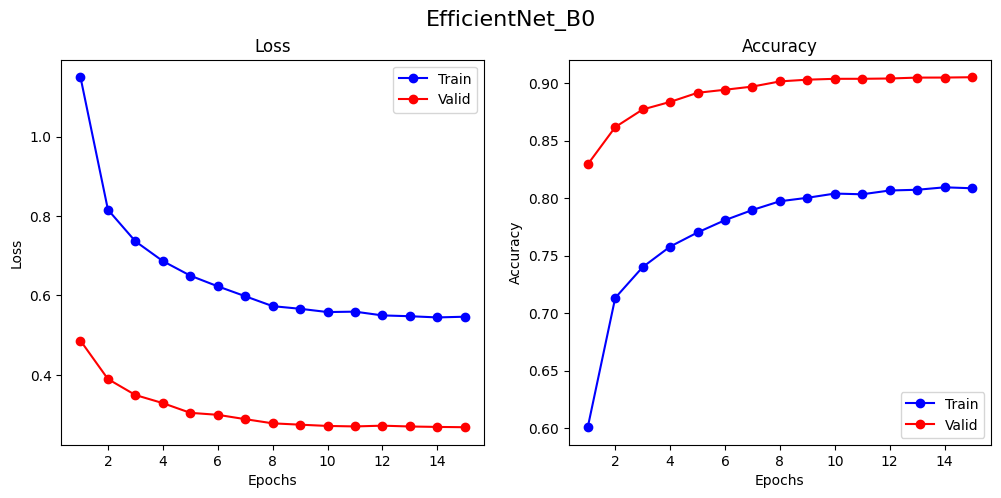

In [9]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [10]:
test_model(model_ft, data.dataloaders['test'], device, folder)

Accuracy: 0.9034

Classification Report:
              precision    recall  f1-score   support

    airplane       0.95      0.93      0.94      9000
  automobile       0.88      0.88      0.88      9000
        bird       0.93      0.91      0.92      9000
         cat       0.88      0.86      0.87      9000
        deer       0.89      0.87      0.88      9000
         dog       0.82      0.87      0.85      9000
        frog       0.96      0.96      0.96      9000
       horse       0.92      0.93      0.93      9000
        ship       0.92      0.95      0.93      9000
       truck       0.87      0.87      0.87      9000

    accuracy                           0.90     90000
   macro avg       0.90      0.90      0.90     90000
weighted avg       0.90      0.90      0.90     90000



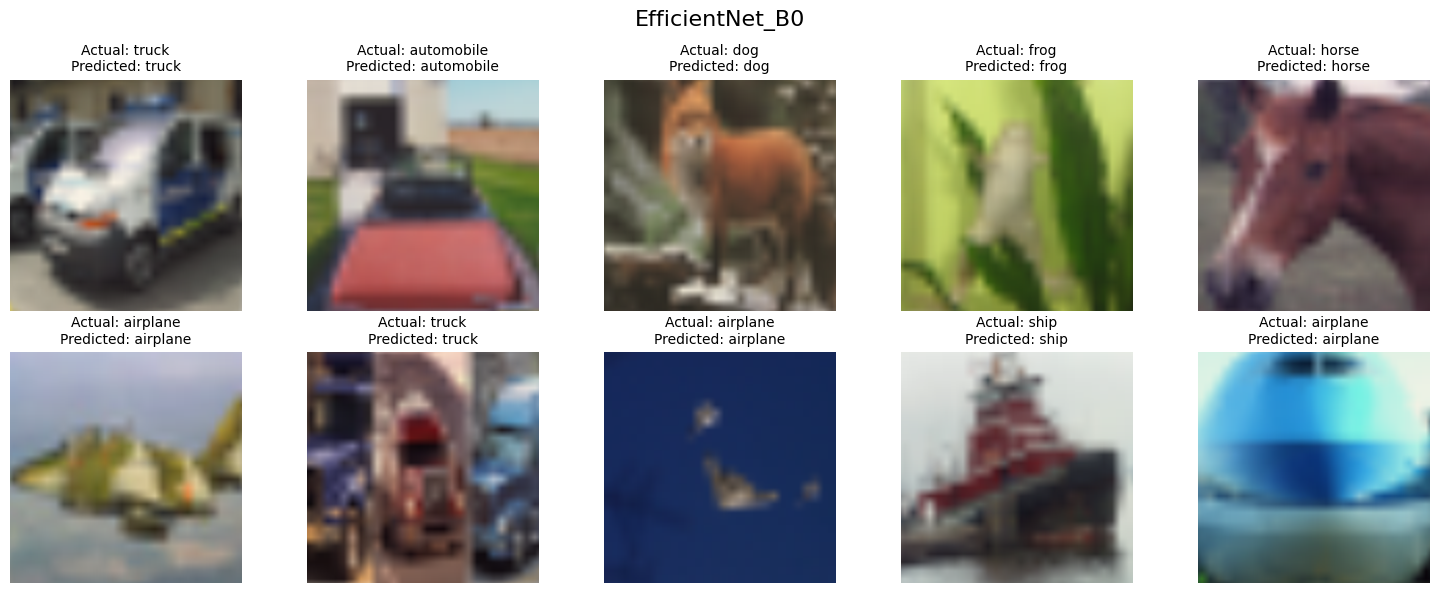

In [11]:
plot_examples(model_ft, data.dataloaders['test'], device, data.class_names,folder, title)

## EfficientNet B0 (frozen layers)


In [13]:
model_ft = models.efficientnet_b0(weights='IMAGENET1K_V1')
for param in model_ft.parameters():
    param.requires_grad = False
num_ftrs =  model_ft.classifier[1].in_features
model_ft.classifier = nn.Sequential(
    nn.Dropout(p=0.2),
    nn.Linear(num_ftrs, len(data.class_names))
)
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [14]:
model_ft, train_loss, train_acc, val_loss, val_acc = train_model(
    model_ft, criterion, optimizer_ft, exp_lr_scheduler, data.dataloaders, device, num_epochs=15
)

Epoch 0/14
----------
train Loss: 1.5864 Acc: 0.4665
valid Loss: 1.0787 Acc: 0.6523

Epoch 1/14
----------
train Loss: 1.4103 Acc: 0.5073
valid Loss: 1.0166 Acc: 0.6639

Epoch 2/14
----------
train Loss: 1.3708 Acc: 0.5189
valid Loss: 0.9771 Acc: 0.6729

Epoch 3/14
----------
train Loss: 1.3633 Acc: 0.5208
valid Loss: 0.9697 Acc: 0.6717

Epoch 4/14
----------
train Loss: 1.3542 Acc: 0.5242
valid Loss: 0.9644 Acc: 0.6755

Epoch 5/14
----------
train Loss: 1.3442 Acc: 0.5296
valid Loss: 0.9537 Acc: 0.6771

Epoch 6/14
----------
train Loss: 1.3434 Acc: 0.5281
valid Loss: 0.9366 Acc: 0.6839

Epoch 7/14
----------
train Loss: 1.3406 Acc: 0.5289
valid Loss: 0.9416 Acc: 0.6824

Epoch 8/14
----------
train Loss: 1.3373 Acc: 0.5296
valid Loss: 0.9473 Acc: 0.6797

Epoch 9/14
----------
train Loss: 1.3385 Acc: 0.5295
valid Loss: 0.9414 Acc: 0.6825

Epoch 10/14
----------
train Loss: 1.3343 Acc: 0.5309
valid Loss: 0.9552 Acc: 0.6766

Epoch 11/14
----------
train Loss: 1.3321 Acc: 0.5318
valid Loss

In [15]:
title = 'EfficientNet_B0_frozen'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model_ft.state_dict(), os.path.join(folder, 'best_model.pt'))

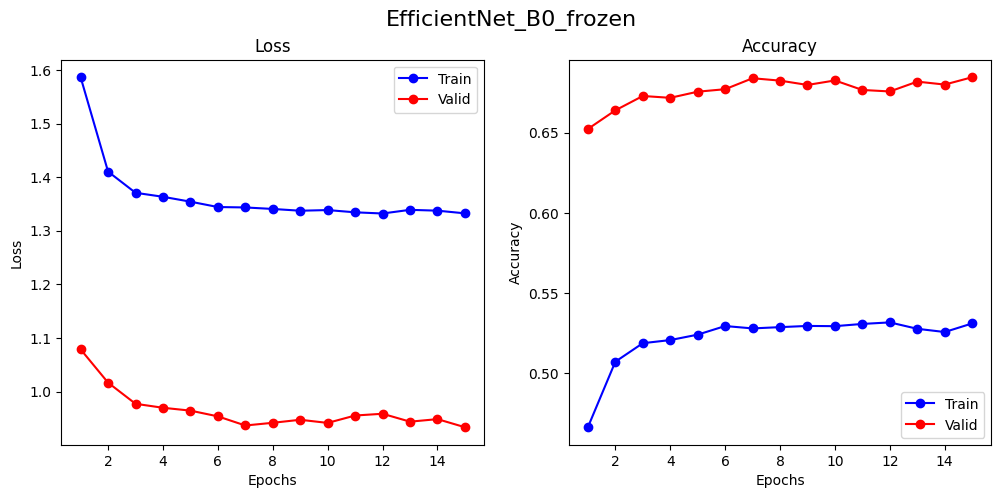

In [16]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [18]:
test_model(model_ft, data.dataloaders['test'], device, folder)

Accuracy: 0.6842

Classification Report:
              precision    recall  f1-score   support

    airplane       0.71      0.80      0.75      9000
  automobile       0.71      0.72      0.72      9000
        bird       0.69      0.65      0.67      9000
         cat       0.58      0.56      0.57      9000
        deer       0.65      0.57      0.61      9000
         dog       0.57      0.60      0.58      9000
        frog       0.74      0.81      0.77      9000
       horse       0.72      0.74      0.73      9000
        ship       0.79      0.69      0.74      9000
       truck       0.70      0.71      0.70      9000

    accuracy                           0.68     90000
   macro avg       0.68      0.68      0.68     90000
weighted avg       0.68      0.68      0.68     90000



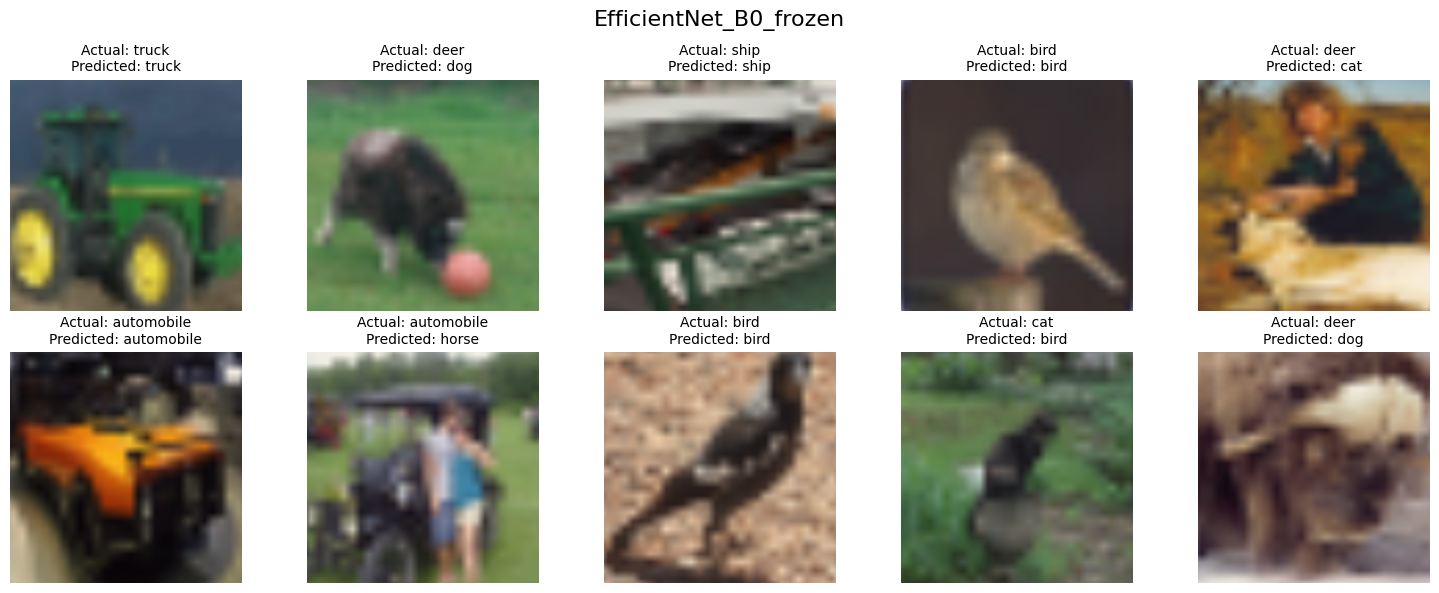

In [21]:
plot_examples(model_ft, data.dataloaders['test'], device, data.class_names,folder, title)